# We have to find the employee Attrition in the company. With the help of the given datasets.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('HR_comma_sep.csv.txt')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.shape

(14999, 10)

## Observation:-
- There are 14999 rows and 10 columns in the dataset.
- Each row contain individual information of a employee in the company.

In [4]:
# Checking for null values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

No null values in the data set.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [7]:
data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
# chaning the name of sales to servic
dic = {'sales':'service'}
data.rename(dic,axis=1,inplace=True)

In [9]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,service,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
# counting the service in different sector of the company who left the job
left=data.groupby('service',as_index=False).left.count().sort_values('left',ascending=False)
left

,service,left
7,sales,4140
9,technical,2720
8,support,2229
0,IT,1227
6,product_mng,902
5,marketing,858
1,RandD,787
2,accounting,767
3,hr,739
4,management,630


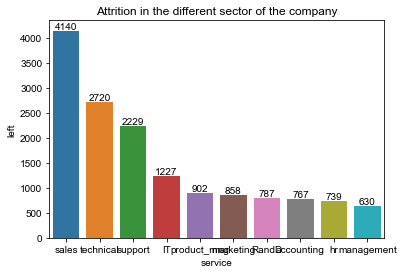

In [11]:
ax=sns.barplot(x='service',y='left',data=left)
ax.bar_label(ax.containers[0])
sns.set(rc={'figure.figsize':(15,5)})
plt.title("Attrition in the different sector of the company")
plt.show()

From the above we can see that the most of the employee who left the company are from Sales department around 4140 employee followed by technical and support and so on...

In [12]:
sal=data.groupby('salary',as_index=False).left.sum().sort_values('left',ascending=False)
sal

,salary,left
1,low,2172
2,medium,1317
0,high,82


Text(0.5, 1.0, 'Attrition rate as per the salary type')

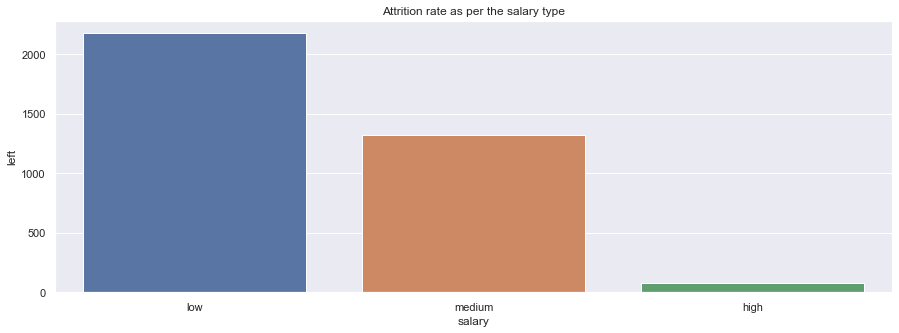

In [13]:
sns.barplot(x='salary',y='left',data=sal)
sns.set(rc={'figure.figsize':(5,5)})
plt.title('Attrition rate as per the salary type')


From the above chart we can draw conclusion employee who have low salary will left the job most.

In [14]:
data.left.value_counts()


0    11428
1     3571
Name: left, dtype: int64

Means there are 3571 employies left the company.

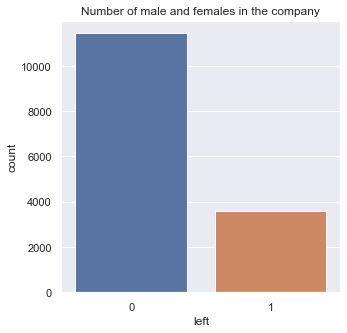

In [15]:
sns.countplot(x='left',data=data)
plt.title("Number of male and females in the company")
plt.show()

In [16]:
data.skew()

satisfaction_level      -0.476360
last_evaluation         -0.026622
number_project           0.337706
average_montly_hours     0.052842
time_spend_company       1.853319
Work_accident            2.021149
left                     1.230043
promotion_last_5years    6.636968
dtype: float64

In [17]:
data.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [18]:
data.groupby(['promotion_last_5years','service'],as_index=False)['left'].count().sort_values('left',ascending=False)

,promotion_last_5years,service,left
7,0,sales,4040
9,0,technical,2692
8,0,support,2209
0,0,IT,1224
6,0,product_mng,902
5,0,marketing,815
1,0,RandD,760
2,0,accounting,753
3,0,hr,724
4,0,management,561


From the above it is clear that the most of the employee who left the job are those who don't get the promotion in last 5 years.

In [19]:
# Applying labeling in salary column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le

LabelEncoder()

In [20]:
data['salary']=le.fit_transform(data['salary'])


In [21]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,service,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [22]:
# Applying ohe in service
data_ohe = pd.get_dummies(data['service'])
data_ohe

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [23]:
data = pd.concat([data,data_ohe],axis=1)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,service,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0


In [24]:
# Droping the service column 
data.drop('service',axis=1,inplace=True)

In [25]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


# Seperating x and y from the dataset

In [26]:
x = data.drop('left',axis=1)
y = data['left']

# Seperating x and y into train and test data

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
def plot_predictions(x,y,y_pred,title):
    plt.scatter(x,y,label="Actual Data")
    plt.plot(x,y_pred,color="red",label="Model Prediction")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.legend()
    plt.show()

# Applying DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [30]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
# Predicting value for x_test
y_pred_dtc = dtc.predict(x_test)
y_pred_dtc

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [32]:
# Checking accuracy 
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_dtc,y_test)

0.974

In [33]:
# Confusion matrix for y_pred_dtc and y_test
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_dtc,y_test)

array([[2243,   27],
       [  51,  679]], dtype=int64)

### observation:-
- From confusion matrix it seems that there are 2241 False negative means that no. of employee not left the company and our model predicted them correct.
- We have 679 True Positive value which means that there are 679 employees left the company and our model also predicted them True.
- Then we have 27 False positive which means that there are 27 who not left the company but our model marked them lefted.
- Similarly we have 53 True negative values which means that there are 53 employee left the company but our model marked them not lefted.

# Applying KNeighborsClassifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc

KNeighborsClassifier()

In [35]:
knc.fit(x_train,y_train)

KNeighborsClassifier()

### Predicting value on x_test

In [36]:
y_pred_knc = knc.predict(x_test)
y_pred_knc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
# Checking accuracy
accuracy_score(y_pred_knc,y_test)

0.9323333333333333

In [38]:
# Confusion matrics for y_pred_knc and y_test
confusion_matrix(y_pred_knc,y_test)

array([[2157,   66],
       [ 137,  640]], dtype=int64)

# Evaluating Bias and Variance for KNeighbors

In [39]:
y_pred_train = knc.predict(x_train)
y_pred_test = knc.predict(x_test)

In [40]:
# Checking mean squared error
from sklearn.metrics import mean_squared_error
mse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
mse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))

In [41]:
mse_train, mse_test

(0.21016742737389338, 0.26012817353502227)

# Evaluating Bias and variance for dtc

In [42]:
y_pred_train_dtc = dtc.predict(x_train)
y_pred_test_dtc = dtc.predict(x_test)

In [43]:
mse_train_dtc = np.sqrt(mean_squared_error(y_train,y_pred_train_dtc))
mse_test_dtc = np.sqrt(mean_squared_error(y_test,y_pred_test_dtc))

In [44]:
mse_train_dtc,mse_test_dtc

(0.0, 0.161245154965971)

In [50]:
x_test.shape

(3000, 18)

In [51]:
y_test.shape

(3000,)